In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline


In [2]:
df = pd.read_csv(r'C:\Users\Ankit Singh\Downloads\archive (2)\WA_Fn-UseC_-Telco-Customer-Churn.csv')

#  **DATA PROCESSING**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges should be a float but is in object




In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is a categorical variable; hence, the distribution is not proper.

75% of customers have tenure less than 55 months.

The average Monthly charges are USD 64.76, where 25% of customers pay more than USD 89.85.

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

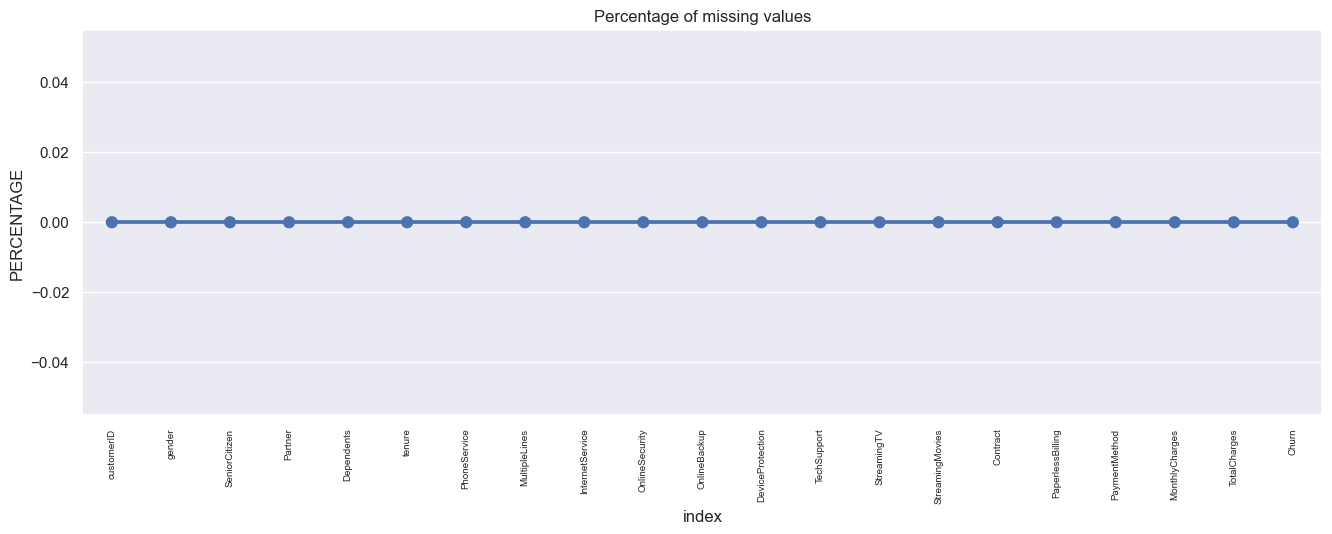

In [5]:
#calculating missing values
missing= pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot(x = 'index', y = 0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* Here, we dont't have missing values

# Data Cleaning

**1.** Creating a copy of data set for manuplation & processing

In [6]:
df_copy = df.copy()

**2.** TotalCharges should be numeric amount. Converting it to numerical data type

In [7]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
 # errors value will be replaced with NaN (Not a Number)
df_copy.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [9]:
df_copy.loc[df_copy ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [10]:
#Removing missing values 
df_copy.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**5.** Looking at the **tenure** we can undestand it is given in months so we are going to dividing customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1 - 12, for tenure between 1 to 2 years, tenure group of 13 - 24, and so on 

In [11]:
# Getting the max tenure
print(df_copy['tenure'].max())

72


In [12]:
# Grouping the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11)for i in range(1, 72, 12)] #list  comprehension 

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels = labels)


In [13]:
df_copy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**4.** Removing columns not required for processing

In [14]:
# droping column customerID and tenure
df_copy.drop(columns = ['customerID', 'tenure'], axis = 1, inplace =True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# EDA(Exploratory Data Analyis)

In the exploratory data analysis, I will be looking at the different Columns and try to understand the data with respect to churn so we can get some insides about the behaviour of the churning cuatomers. 

Lets begin by looking at the distribution of Churn customers.

## Pie Chart Churn Perentage

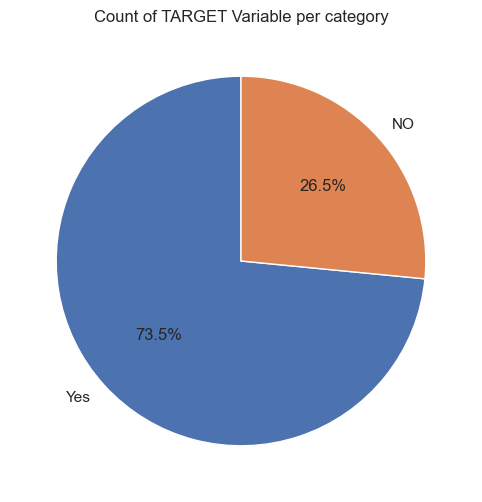

In [19]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(), labels=['Yes','NO'], autopct='%1.1f%%', startangle=90)
plt.title("Count of TARGET Variable per category")
plt.show()

In [20]:
100*df['Churn'].value_counts()/ len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [21]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

From above figures we can conclude that:

* Data is highly imblanced, ratio = 73:27


## Univariate Analysis

**we can use below code to get all the analysis with respect to the churn but I am going to do it seprately so I can expain each plot**

In [ ]:
for i, variable in enumerate(df_copy.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df_copy, x = variable, hue = 'Churn')

## Gender

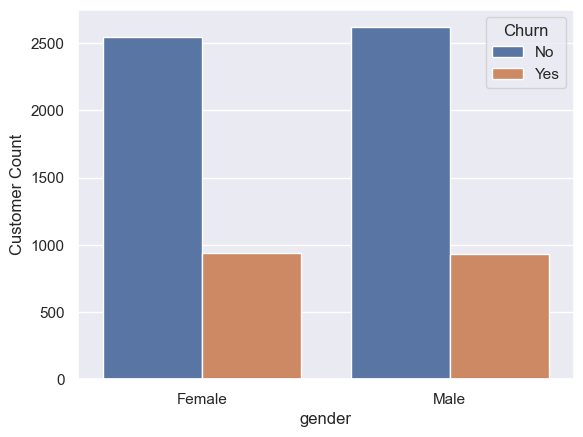

In [23]:
sns.countplot(x = "gender", data = df_copy, hue = 'Churn')
plt.ylabel('Customer Count')
plt.show()


The number of male and female customers who chose to churn is nearly the same

## Partner

<Axes: xlabel='Partner', ylabel='count'>

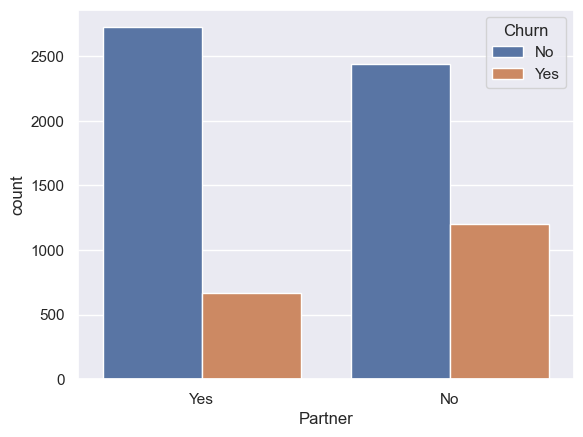

In [24]:
sns.countplot(x = "Partner", data = df_copy, hue = 'Churn')

Customers who do not have partners tend to churn more than those who have.

## Senior Citizen

<Axes: xlabel='SeniorCitizen', ylabel='count'>

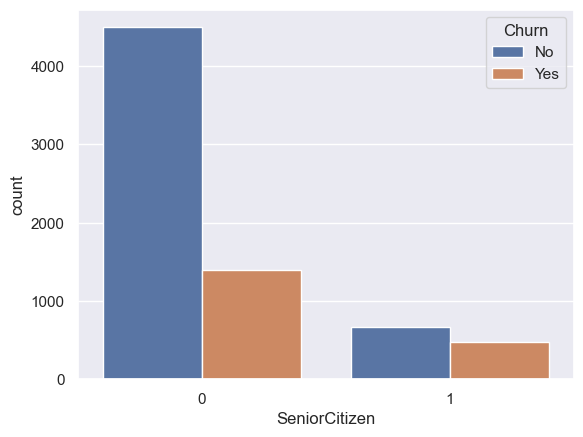

In [25]:
sns.countplot(x = "SeniorCitizen", data = df_copy, hue = 'Churn')

Young customers tend to have a higher churn rate than senior citizens. From this, we can develop new marketing strategies focusing on young customers.

## Dependents

<Axes: xlabel='Dependents', ylabel='count'>

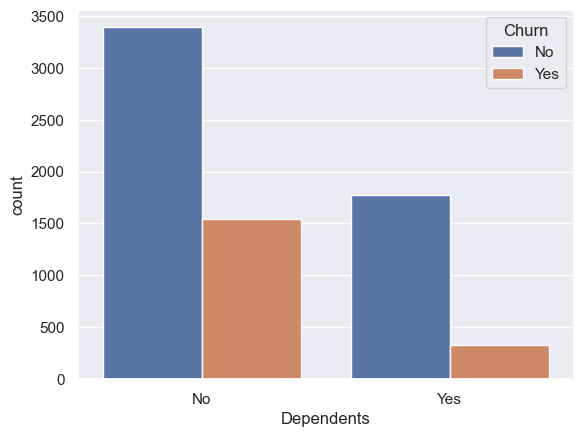

In [26]:
sns.countplot(x = "Dependents", data = df_copy, hue = 'Churn')

Customers who are not dependents have a higher churning rate than those who are dependent.

## Phone Services

<Axes: xlabel='PhoneService', ylabel='count'>

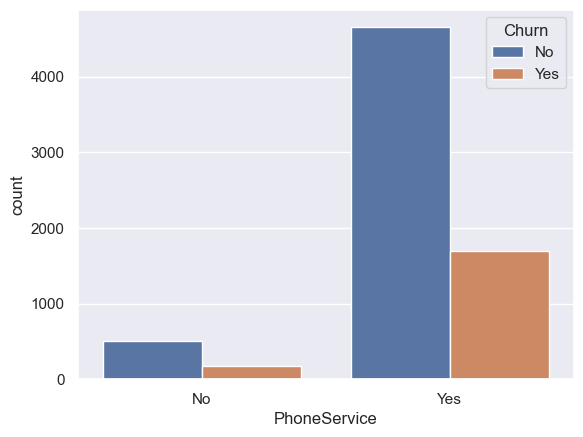

In [27]:
sns.countplot(x = "PhoneService", data = df_copy, hue = 'Churn')

Customers who opt for phone services tend to churn more frequently.

## Multiple Lines

<Axes: xlabel='MultipleLines', ylabel='count'>

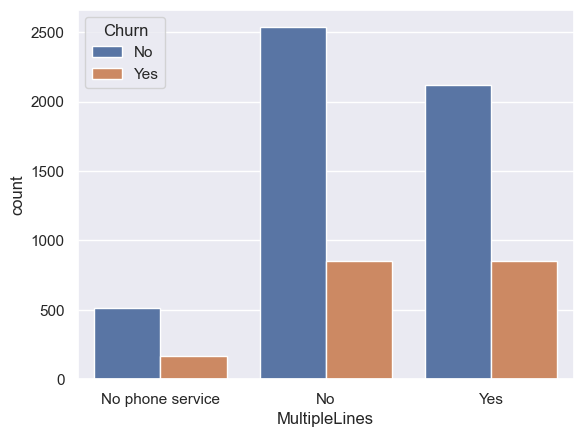

In [28]:
sns.countplot(x = "MultipleLines", data = df_copy, hue = 'Churn')


## Internet Services

<Axes: xlabel='InternetService', ylabel='count'>

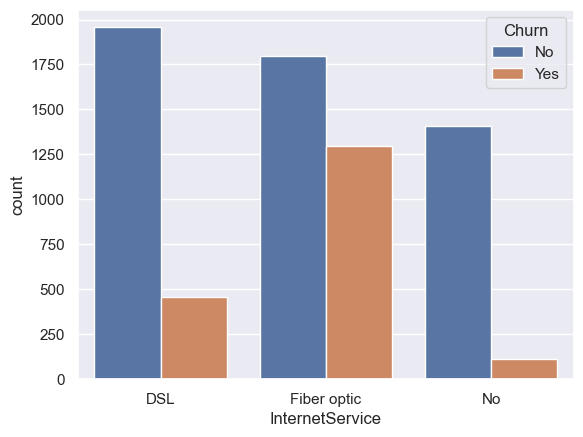

In [29]:
sns.countplot(x = "InternetService", data = df_copy, hue = 'Churn')

customers who opt for Fiber optic tends to churn more.

## Online Security

<Axes: xlabel='OnlineSecurity', ylabel='count'>

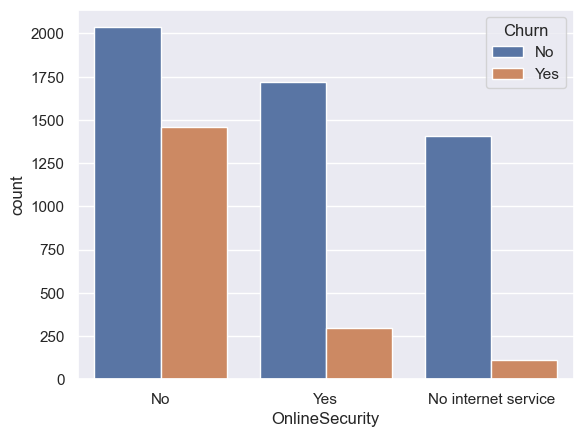

In [30]:
sns.countplot(x = "OnlineSecurity", data = df_copy, hue = 'Churn')

## Online Backup

<Axes: xlabel='OnlineBackup', ylabel='count'>

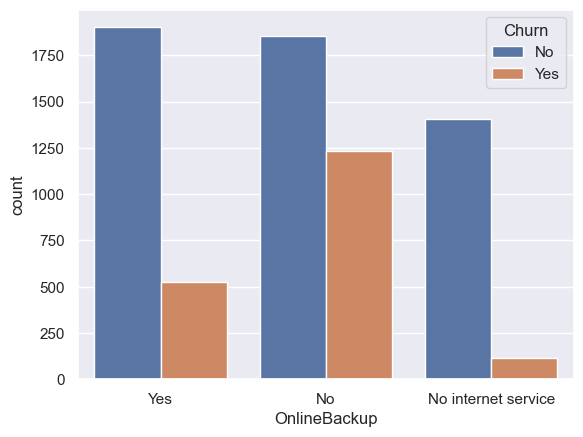

In [31]:
sns.countplot(x = 'OnlineBackup', data = df_copy, hue = 'Churn')

## Device Protection

<Axes: xlabel='DeviceProtection', ylabel='count'>

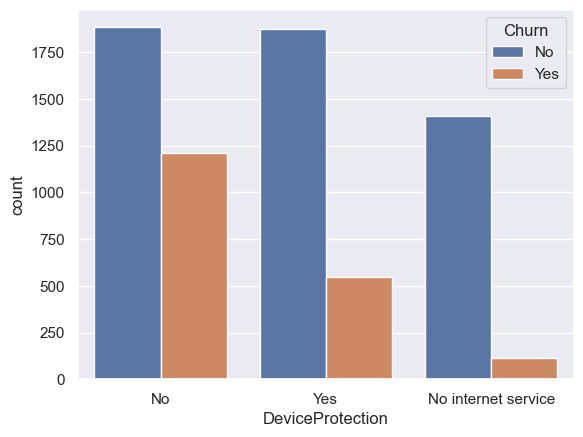

In [32]:
sns.countplot(x = "DeviceProtection", data = df_copy, hue = 'Churn')

## Tech Support

<Axes: xlabel='TechSupport', ylabel='count'>

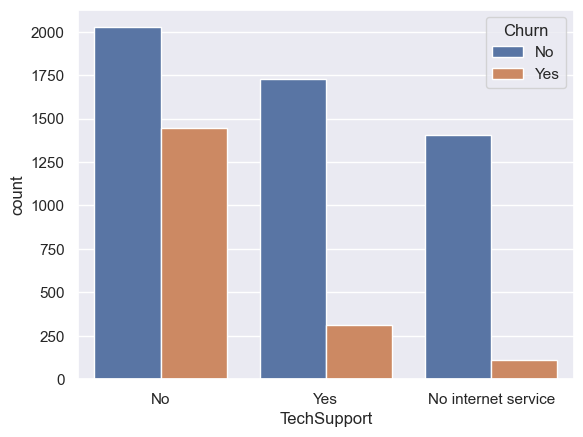

In [33]:
sns.countplot(x = 'TechSupport',data = df_copy, hue = 'Churn')

## Streaming TV

<Axes: xlabel='StreamingTV', ylabel='count'>

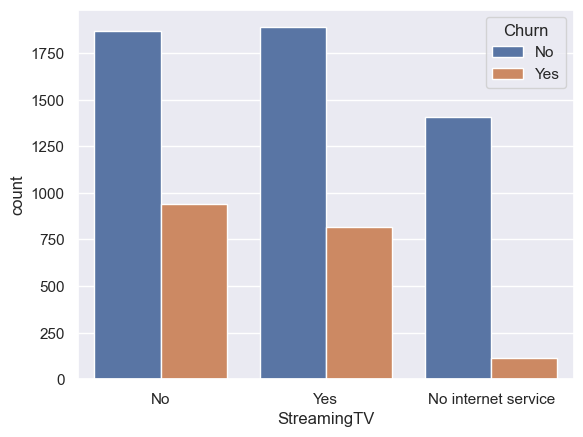

In [34]:
sns.countplot(x = "StreamingTV", data = df_copy, hue = 'Churn')

## Paperless Billing

<Axes: xlabel='PaperlessBilling', ylabel='count'>

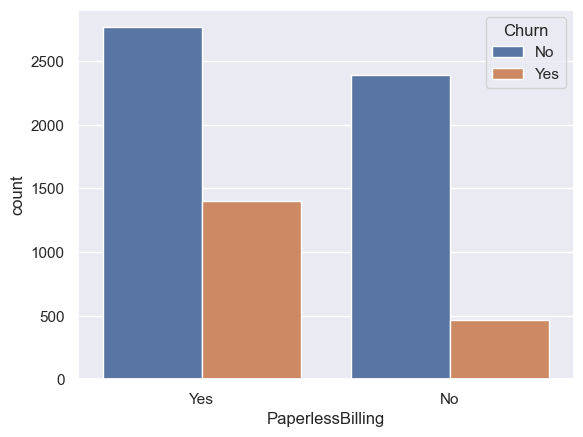

In [35]:
sns.countplot(x = "PaperlessBilling", data = df_copy, hue = 'Churn')

## Payment Method

<Axes: xlabel='PaymentMethod', ylabel='count'>

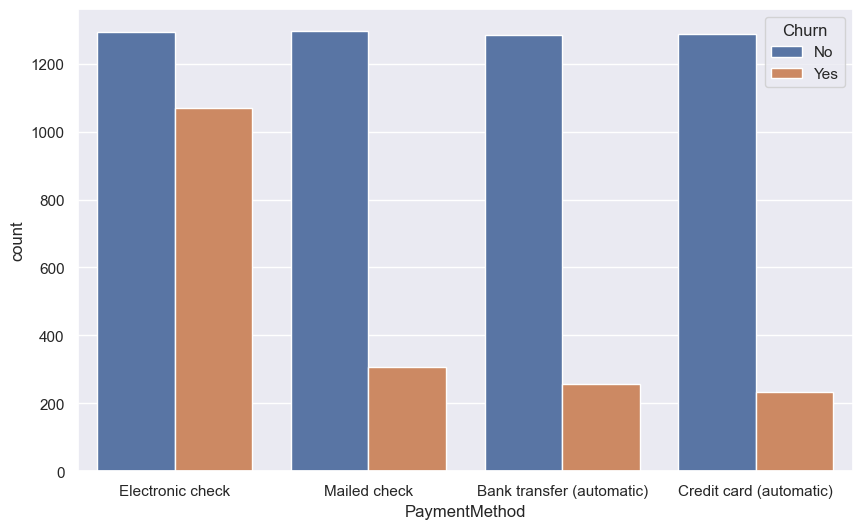

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "PaymentMethod", data = df_copy, hue = 'Churn')

## Contract

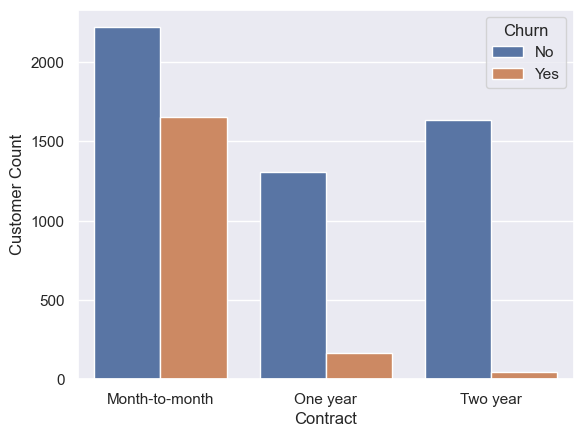

In [37]:
sns.countplot(x = "Contract", data = df_copy, hue = 'Churn')
plt.ylabel('Customer Count')
plt.show()


We can see that the customers who chose a month-to-month contract have a higher churn rate compared to those who opt for a yearly contract.

## Tenure Group

<Axes: xlabel='tenure_group', ylabel='count'>

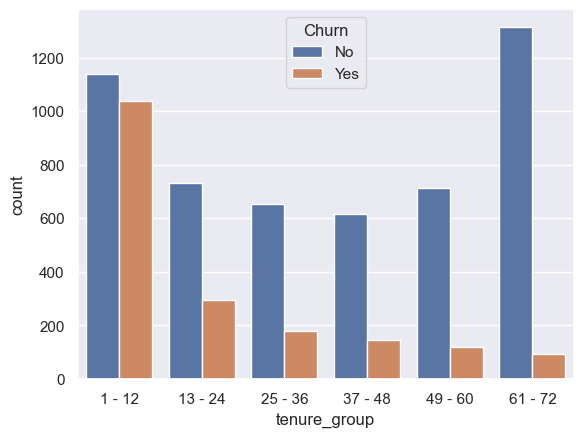

In [38]:
sns.countplot(x = "tenure_group", data = df_copy, hue = 'Churn')

Customers who tend to choose yearly or month-to-month contracts tend to churn more.

### Converting the target variable **"Churn"** in a binary variable 
* Yes == 1
* No == 0

In [39]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)

In [40]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Converting all the categorical variables into dummy variables

In [41]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [42]:
df_copy_dummies.columns.values

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two ye

## **Churn by monthly Charges and Total charges**

Text(0.5, 1.0, 'Monthly charges by churn')

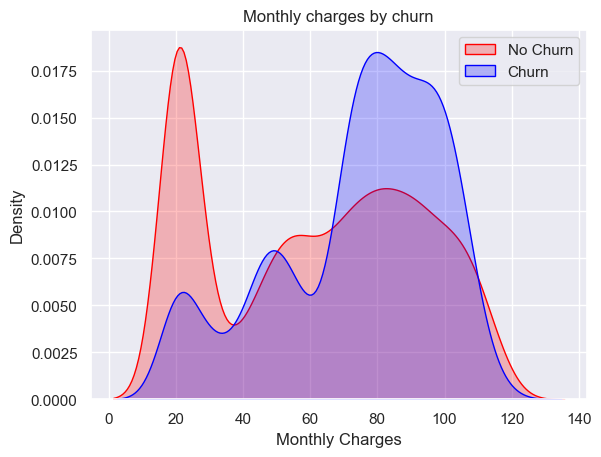

In [43]:
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0)], color = "Red", fill= True)
Mth = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1)], color = "Blue", fill= True)
Mth.legend(["No Churn", "Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### Churn is high when Monthaly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

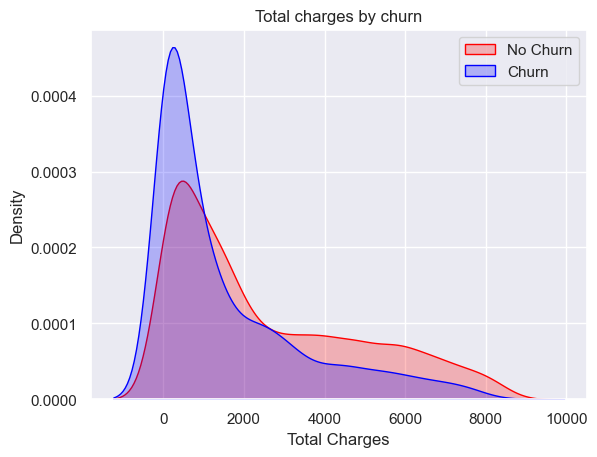

In [44]:
tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 0)], color = "Red", fill = True)
tot = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 1)], color = "Blue", fill = True)
tot.legend(["No Churn", "Churn"], loc = "upper right")
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge and higher Churn.

Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

## Correlation of all parameters with Churn

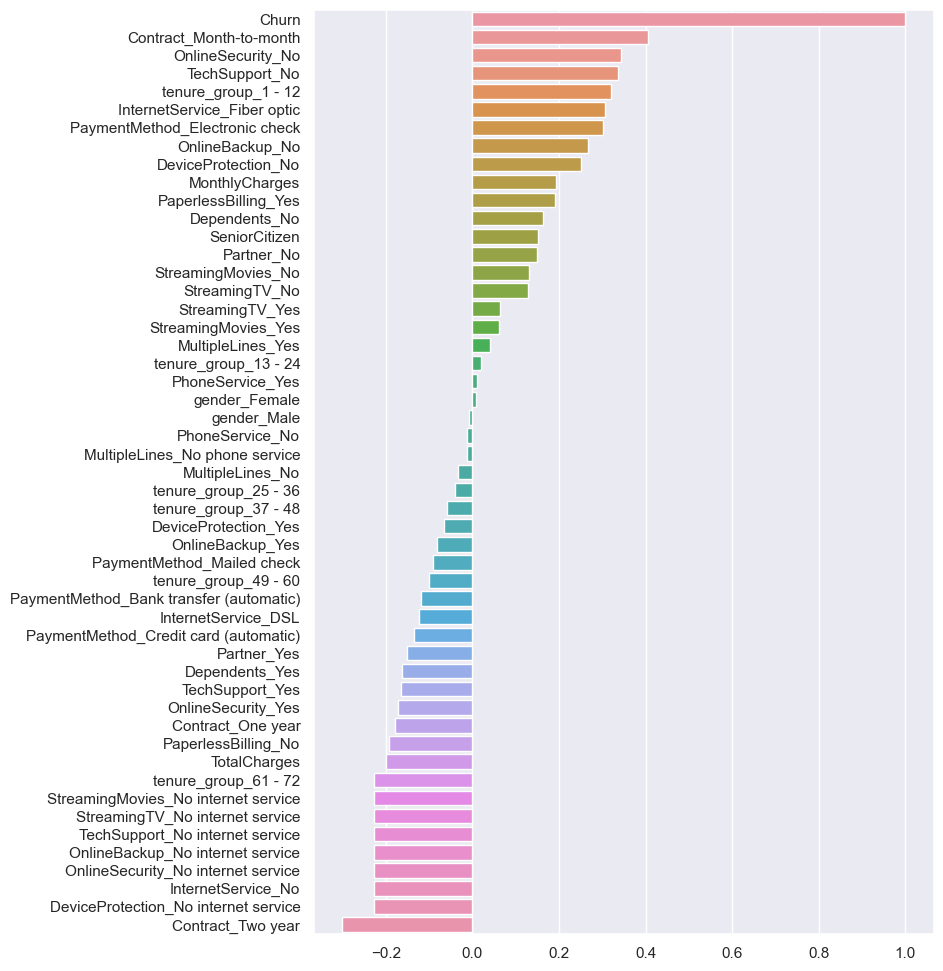

In [45]:
plt.figure(figsize=(8, 12))
correlation = df_copy_dummies.corr()["Churn"].sort_values(ascending=False)
sns.barplot(y=correlation.index, x=correlation.values)
plt.show()


### **Derived Insight:**

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below.

<Axes: >

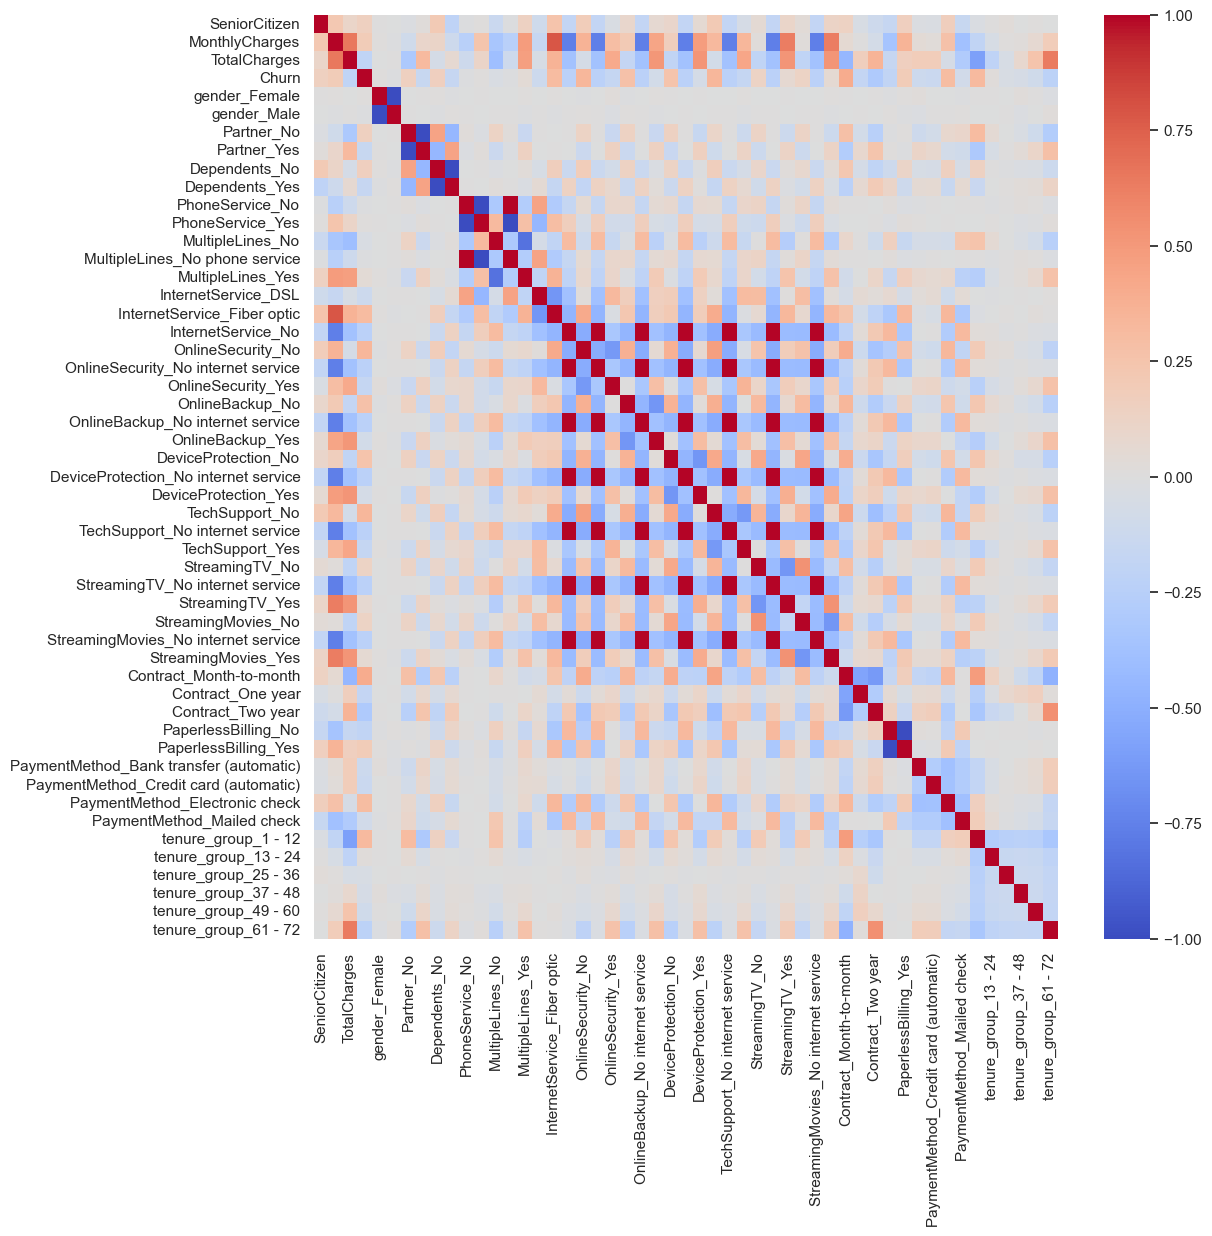

In [46]:
#coorelation heatmap
plt.figure(figsize=(12,12)) 
sns.heatmap(df_copy_dummies.corr(), cmap='coolwarm')

## Bivariate Analysis

As we are more intrested in the Churners I am going to analyse the churners with related to different insides we get from above analaysis on the paramters where the churnner are heigh 

In [51]:
#Creating new data Frame for churnners and not churnners
new_df_target0 = df_copy.loc[df_copy["Churn"] ==0]
new_df_target1 = df_copy.loc[df_copy['Churn'] == 1]

In [54]:
# defining function to plot 
def uniplot(df, col, title, hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 4 + 2*len(temp.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

## Distribution of Churner with respect to Partner

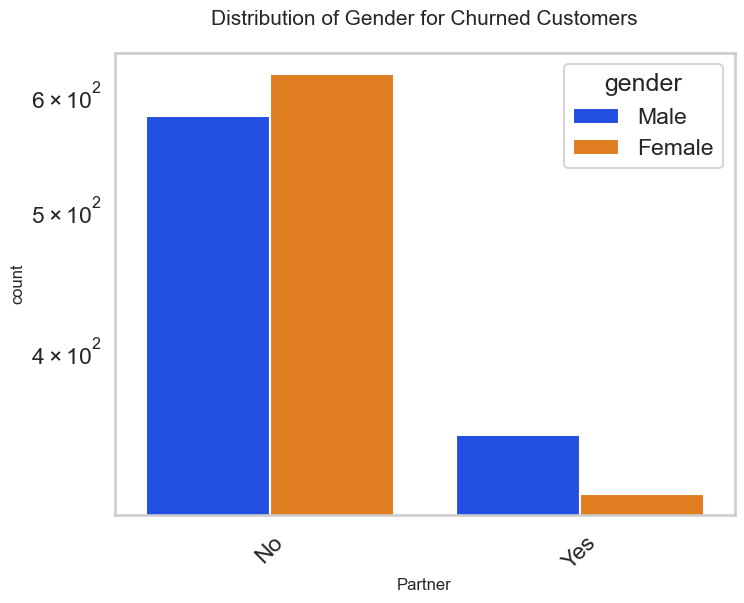

In [55]:
uniplot(new_df_target1,col = 'Partner', title = 'Distribution of Gender for Churned Customers', hue = 'gender')

While the graph may not reveal particularly intriguing insights at first glance, upon closer examination, we observe that male customers who have partners tend to exhibit a higher churn rate. This suggests that there may be a correlation between the gender of customers, their relationship status (having a partner), and the likelihood of churning

## Distribution of Churner with respect to PaymentMethod

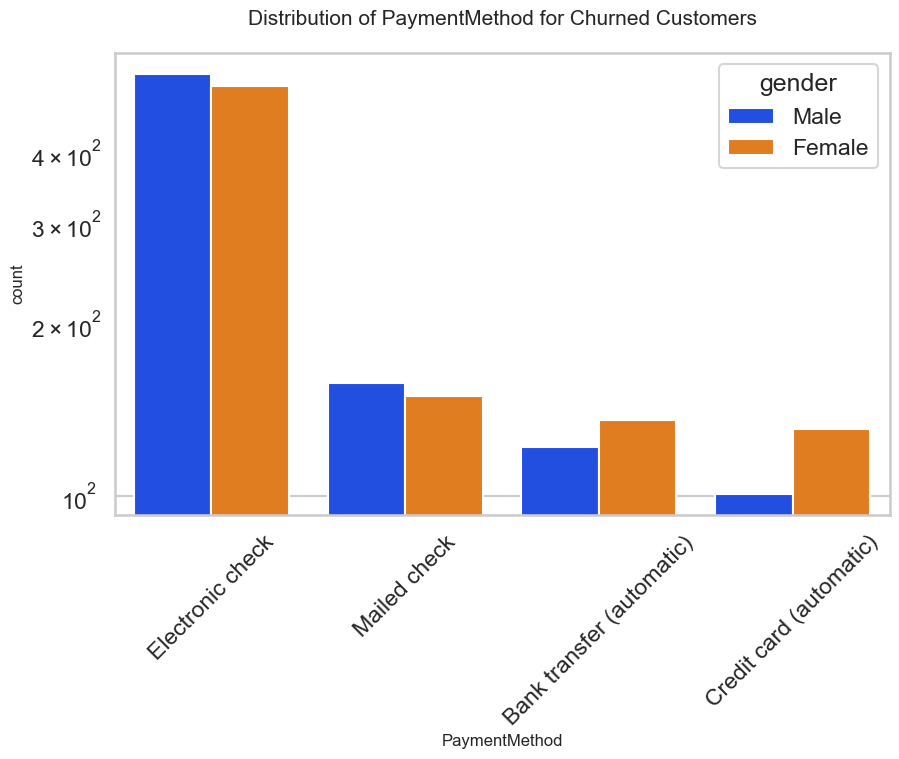

In [56]:
uniplot(new_df_target1, col = 'PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue = 'gender')

 Those who opt for automatic payment methods tend to exhibit a higher churn rate. This implies a potential connection between a customer's gender, their choice of payment method (specifically, automatic payments), and their likelihood of churning.

## Distribution of Churner with respect to Contracts

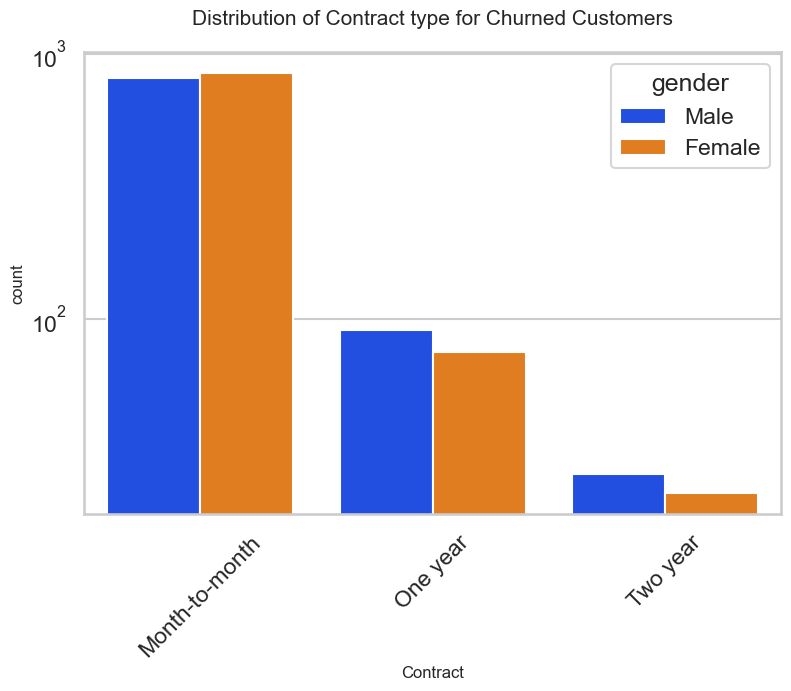

In [57]:
uniplot(new_df_target1, col = 'Contract', title = 'Distribution of Contract type for Churned Customers', hue = 'gender')

Customers who opt for long-term contracts tend to be more committed and exhibit a lower likelihood of churning. This suggests a positive correlation between the choice of a longer contract duration and customer loyalty, as those who commit to longer terms are less likely to churn.

## Distribution of Churner with respect to InternetServices

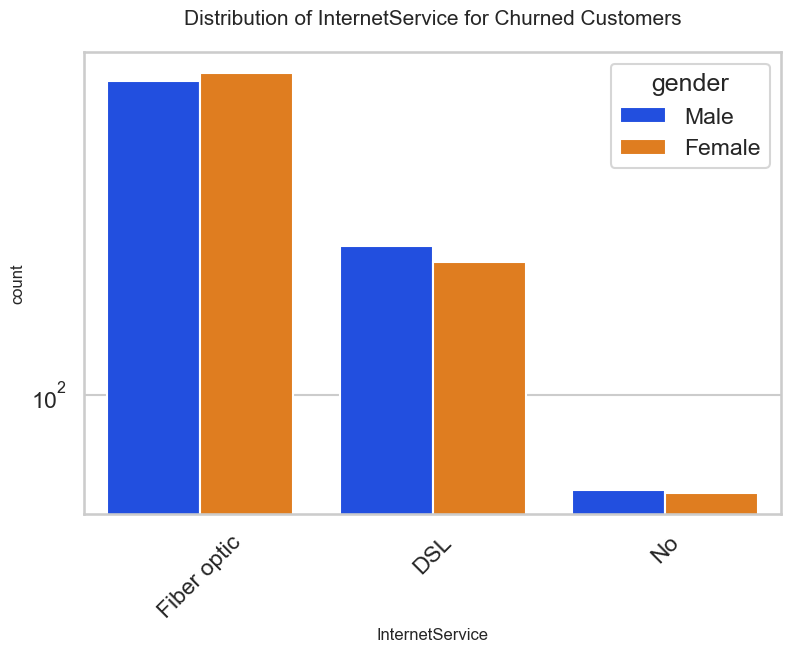

In [58]:
uniplot(new_df_target1, col = 'InternetService', title = 'Distribution of InternetService for Churned Customers', hue = 'gender')

## Distribution of Churner with respect to Senior Citizen

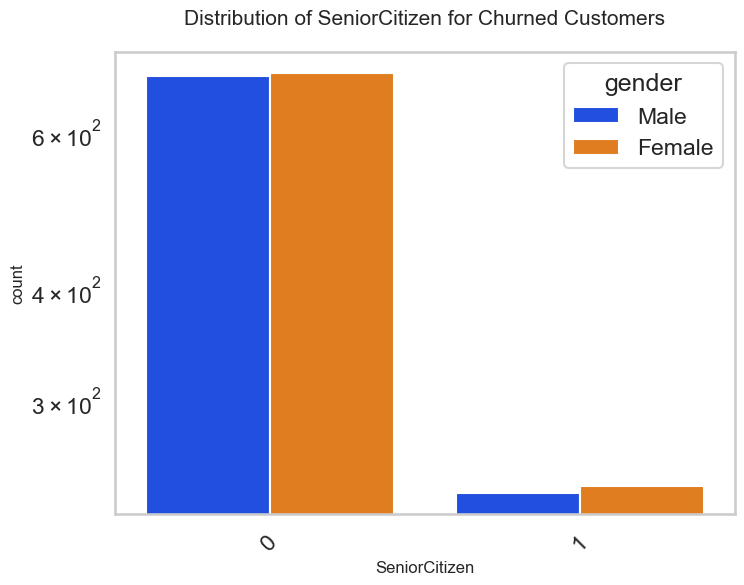

In [59]:
uniplot(new_df_target1, col = 'SeniorCitizen', title = 'Distribution of SeniorCitizen for Churned Customers', hue = 'gender')

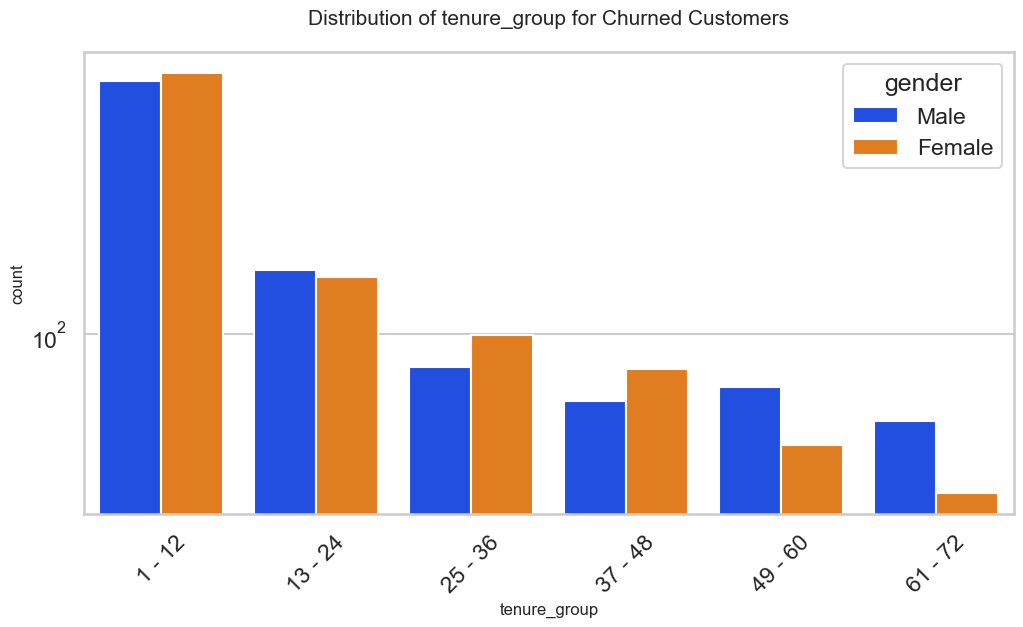

In [60]:
uniplot(new_df_target1, col = 'tenure_group', title = 'Distribution of tenure_group for Churned Customers', hue = 'gender')

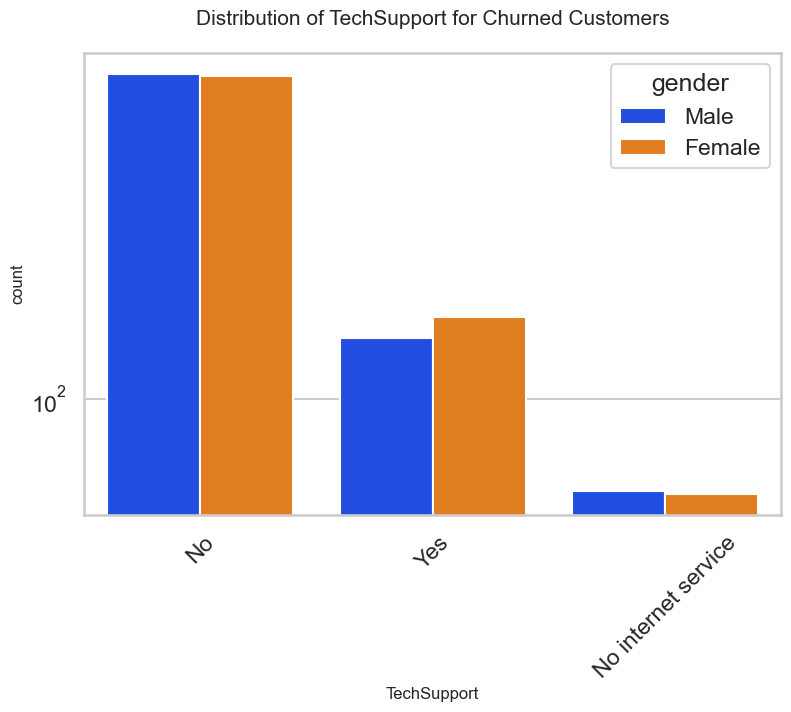

In [61]:
uniplot(new_df_target1, col = 'TechSupport', title = 'Distribution of TechSupport for Churned Customers', hue = 'gender')

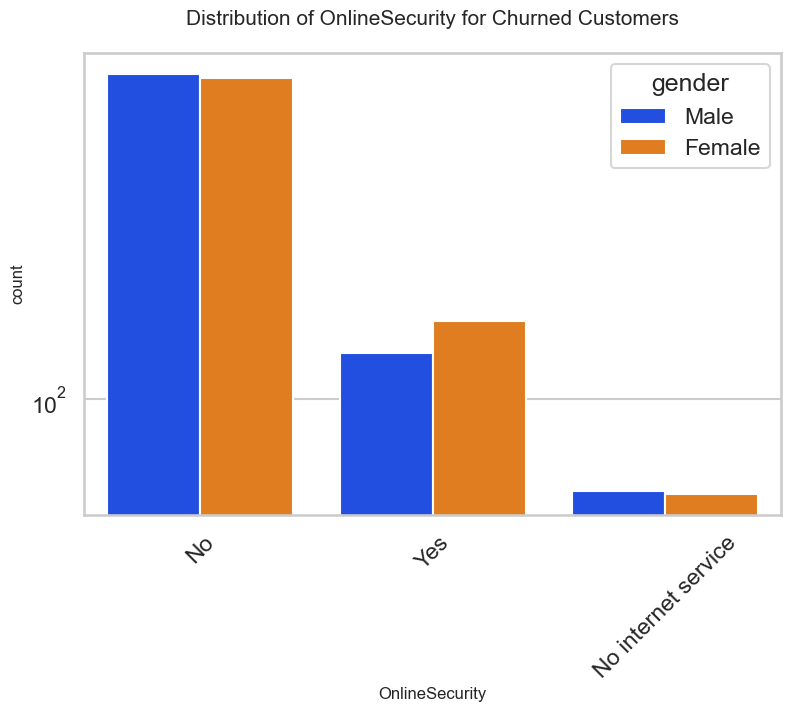

In [62]:
uniplot(new_df_target1, col = 'OnlineSecurity', title = 'Distribution of OnlineSecurity for Churned Customers', hue = 'gender')

# Conclusion

### Insights
1. Electronic Check Medium: It's noteworthy that customers using electronic check as their payment medium tend to have the highest churn rates. This suggests that there might be issues or concerns related to the electronic check payment method that could be contributing to churn.

2. Contract Type - Monthly Customers: Customers on a monthly contract basis are more likely to churn. This could be attributed to the absence of long-term commitments, as they have the flexibility to switch providers without contractual obligations.

3. No Online Security, No Tech Support: Customers without online security and tech support features tend to exhibit higher churn rates. This indicates the importance of these services in retaining customers, as their absence may lead to dissatisfaction and attrition.

4. Non-Senior Citizens: It's interesting to observe that non-senior citizens are more likely to churn. This demographic insight can inform targeted retention strategies to better cater to the needs and preferences of different age groups.

# Model Building

In [64]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [65]:
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [66]:
# Creating X and Y variable
df_copy_dummies.dropna(how = 'any', inplace = True)
x = df_copy_dummies.drop('Churn', axis =1)
x
 

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7039,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7040,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [67]:
y = df_copy_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


# Decision Tree Classifier

In [69]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)

In [70]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [71]:
y_pred = model_dt.predict(x_test)

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1019
           1       0.63      0.47      0.54       388

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [74]:
print(confusion_matrix(y_test, y_pred))

[[910 109]
 [206 182]]


When building a model, it's essential to address the issue of class imbalance, as our dataset exhibits an imbalance with a ratio of 73:27. While the overall accuracy may seem good at 75%, the model's performance is not considered satisfactory. The minority class, which represents 1 and typically has a low precision score, needs special attention.

To tackle the class imbalance, we will employ over-sampling and under-sampling techniques in our model-building process. By addressing this imbalance, we aim to improve the model's ability to correctly classify the minority class and enhance overall performance

# SMOTEENN

In [92]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [93]:
#creating new variables
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size = 0.2) 

In [94]:
# Creating model
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)


In [95]:
# training the model
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [96]:
#predicitng the churn 
y_pred_smote = model_dt_smote.predict(xr_test)

In [97]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       527
           1       0.94      0.93      0.94       641

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168



### Evaluating the Decision Tree Regressor Model

In [98]:
model_dt_smote.score(xr_train, yr_train)

0.9349036402569593

In [99]:
dft = pd.DataFrame({'Actual': yr_test, 'Predicted': y_pred_smote})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


C:\Users\Ankit Singh\AppData\Local\Temp\ipykernel_21276\1852095234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
C:\Users\Ankit Singh\AppData\Local\Temp\ipykernel_21276\1852095234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist

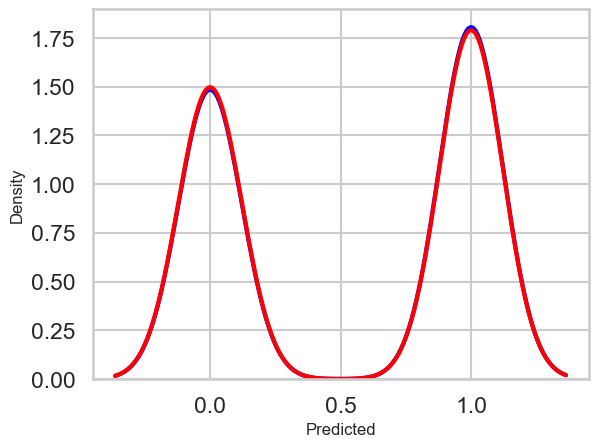

In [100]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted');

The blue shows the distribution count foractual values and the red line shows the distribution count for predicted values. The predicted values is on the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
sm = SMOTEENN()
x_resampled_rf, y_resampled_rf = sm.fit_resample(x,y)

In [85]:
#creating new variables
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled_rf, y_resampled_rf, test_size = 0.2) 

In [86]:
model_smote_rf = RandomForestClassifier(n_estimators = 100 ,criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf =8)

In [87]:
model_smote_rf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [88]:
y_pred_smote_rf = model_smote_rf.predict(xr_test)

### Evaluating the  RandomForestClassifier

In [89]:
model_smote_rf.score(xr_train, yr_train)

0.9408908591935824

In [179]:
print(classification_report(yr_test, y_pred_smote_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       543
           1       0.93      0.97      0.95       644

    accuracy                           0.95      1187
   macro avg       0.95      0.94      0.94      1187
weighted avg       0.95      0.95      0.95      1187



/tmp/ipykernel_32/2246622980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
/tmp/ipykernel_32/2246622980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Pr

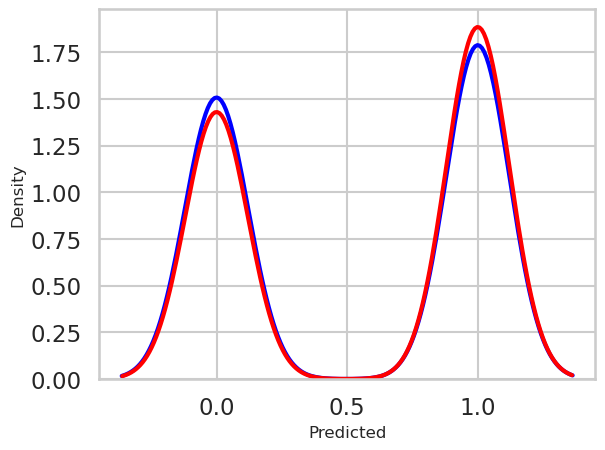

In [180]:
dft = pd.DataFrame({'Actual': yr_test, 'Predicted': y_pred_smote_rf})
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual');
sns.distplot(dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted');

The blue shows the distribution count foractual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.